<h1>Generation of synthetic data</h1>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
#Question 1
x = np.loadtxt("Noise.txt")

In [11]:
#Question 2
N = len(x)
Tmin = 1
Tmax = 1000

def Tfun(n):
    t = Tmin*np.exp(-(n-1)*np.log(Tmin/Tmax)/(N-1))
    return(t)

T = [Tfun(n+1) for n in range(N)]

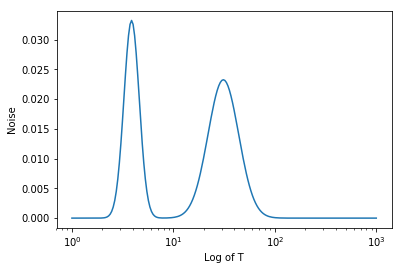

In [12]:
#Question3
fig = plt.figure()
plt.plot(T, x)
plt.xscale('log')
plt.xlabel('Log of T')
plt.ylabel('Noise')
plt.show()

In [13]:
#Question 4
M = 50
tmin = 0
tmax = 1.5

def tfun(m):
    t = tmin + (m-1)*(tmax-tmin)/(M-1)
    return(t)

t = [tfun(m+1) for m in range(M)]

In [14]:
#Question 5 
K = np.array([np.array([np.exp(-T[n]*t[m]) for n in range(N)]) for m in range(M)])

In [15]:
#Question 6
z = np.dot(K,x)
sig = 0.01 * z
y = np.dot(K,x) + random.gauss(0,np.dot(sig,sig)*np.ones(M))

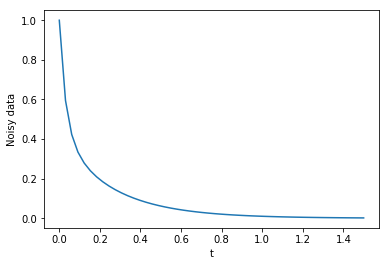

In [16]:
#Question 7
fig = plt.figure()
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('Noisy data')
plt.show()

<h1>Comparison of regularization strategies</h1>

In [17]:
#Question 1

Smoothness prior:
$g(x) = \frac{1}{2}\left \| D(x) \right \|^{2} = \frac{1}{2}\sum_{N}^{i=1}(x_{i}-x_{i-1})^{2}$
We take i and j in $\left \lfloor 1..N \right \rfloor$
$\frac{\partial g}{\partial x_{i}} = 2x_{i} - x_{i-1} - x_{i+1}$
$\frac{\partial^{2} g}{\partial^{2} x_{i}} = 2$ and $\frac{\partial^{2} g}{\partial x_{i}x_{j}} = -1$ if j is equal to i+1 or i-1, $\frac{\partial^{2} g}{\partial x_{i}x_{j}} = 0$ otherwise.
So the $\frac{\partial^{2} g}{\partial^{2} x_{i}} = 2$ > 0 and the function g is convex. So the problem has a solution which is unique

Smoothness prior + constraints : $g(x) = \frac{1}{2}\left \| D(x) \right \|^{2}+ \iota _{\left [ x_{min},x_{max} \right ]^{N}}(x)$, Thanks to the indicator function we will now have to minmise the smoothness prior function in ${\left [ x_{min},x_{max} \right ]^{N}}$ which is compact so the g function has a minimum which is unique and the problem 4 has a unique minimum

Sparsity prior : $g(x) = \left \|  x\right \|_{1}$, g is a norm so by defition g is convex so g and the problem have a minimum but it is not necessary unique.

In [18]:
#Question 2

To solve the problem 4 we can use the Forward-Backward optimization algorithm. We will have a first question equal to $\frac{1}{2}\left \|Kx-y  \right \|^{2}$ and $\beta g(x)$ the second function.

In [19]:
#Question 3
#We define the discrete gradient operator matrix
D = np.zeros((N,N))
D[0][0] = 1
D[0][-1] = -1
for i in range(N-1):
    D[i+1][i+1]=1
    D[i+1][i]= -1
D

array([[ 1.,  0.,  0., ...,  0.,  0., -1.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [ ]:
gamma = 0.1
b = 0.1
lamb=0.1

In [ ]:
def proxOperator(x,f):
    return

In [24]:
def f(x):
    return(0.5*np.linalg.norm(np.dot(K,x)-y)**2)

In [25]:
def gSmooth(x):
    return(0.5*np.linalg.norm(np.dot(D,x))**2)

In [26]:
def gSparsity(x):
    return(np.linalg.norm(x,1))

In [ ]:
#Prox operator for the f function
def proxOperator(x):
    return(np.dot(np.linalg.inv(Id+np.dot(K.T,K)*l),x+b*gamma*np.dot((K.T),y)))

In [ ]:
def gradSmmoth():
    return

In [53]:
def gradSparsity(x):
    if(x<0):
        return(-1)
    elif (x>0):
        return(1)
    else:
        return(0)
    
def gradSparsityVector(x):
    return([gradSparsity(i) for i in x])

In [54]:
x = np.array([1,5,0,-9])
grad = [gradSparsity(i) for i in x]
grad
gradSparsityVector(x)

[1, 1, 0, -1]

In [ ]:
def forward_backward(function,grad):
    x = np.zeros(N)#Condition initial
    for i in range(100): #On fait 100 itérations de l'algorithme
        y = x - gamma*grad(x)
        x = x +lamb*(proxOperator(gamma*y)-x)
    return(x)

In [28]:
#Question 4
def error(x1,x2):
    return((np.linalg.norm(x1-x2)/np.linalg.norm(x2))**2)

In [33]:
#Question 5
#We create a list of beta to test
B = np.sort(np.array([np.array(range(1,11))*10**-i for i in range(1,5)]).reshape((40,)))
B

array([1.e-04, 2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04,
       9.e-04, 1.e-03, 1.e-03, 2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03,
       7.e-03, 8.e-03, 9.e-03, 1.e-02, 1.e-02, 2.e-02, 3.e-02, 4.e-02,
       5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02, 1.e-01, 1.e-01, 2.e-01,
       3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01, 1.e+00])

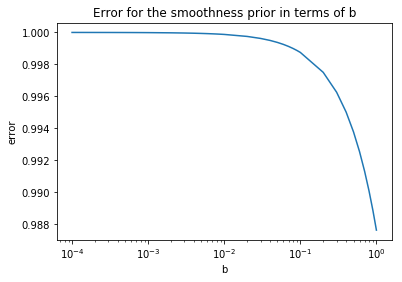

In [45]:
L = [error(f(x) + b*gSmooth(x),x) for b in B]
fig = plt.figure()
plt.plot(B, L)
plt.title('Error for the smoothness prior in terms of b')
plt.xlabel('b')
plt.xscale('log')
plt.ylabel('error')
plt.show()

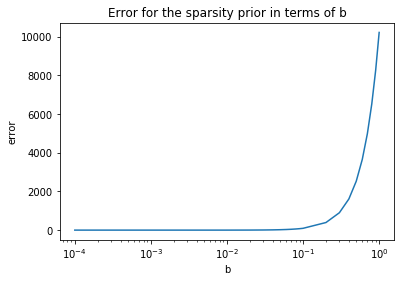

In [47]:
L = [error(f(x) + b*gSparsity(x),x) for b in B]
fig = plt.figure()
plt.plot(B, L)
plt.title('Error for the sparsity prior in terms of b')
plt.xlabel('b')
plt.xscale('log')
plt.ylabel('error')
plt.show()

<h1>Maximum entropy regularization</h1>

In [ ]:
#Question1

In [ ]:
#Question2

In [ ]:
#Question3

We take x in $R^{N}$ Voir notes dans le cahier ou photo

In [ ]:
#Question4


In [ ]:
#Question5

In [ ]:
#Question6

In [ ]:
#Question7

In [ ]:
#Question8